##Importing Data


In [ ]:
!pip install ipywidgets
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 64.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 93.0 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102754 sha256=86229fabc027fa5ac63f89d8548a243ef7dc5db87244506de8a90a91f5d00002
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [ ]:
#import the libraries
import pandas as pd
from shapely.geometry import  Point
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

pd.set_option('display.max_columns', 100)


In [ ]:
df1 = pd.read_csv('/content/sample_data/ProvincePopulation (1).csv').sort_values('Population',ascending=False)
df = pd.read_csv('/content/sample_data/SA dataset.csv')
df['Total 2005-2016'] = df.sum(axis=1)
df.head()


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,38187
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,35776
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,35889


##Data Cleaning

In [ ]:
#Count the number of empty(NaN, NAN, na)values in each column
df.isna().sum()

Province           0
Station            0
Category           0
2005-2006          0
2006-2007          0
2007-2008          0
2008-2009          0
2009-2010          0
2010-2011          0
2011-2012          0
2012-2013          0
2013-2014          0
2014-2015          0
2015-2016          0
Total 2005-2016    0
dtype: int64

In [ ]:
df.columns

Index(['Province', 'Station', 'Category', '2005-2006', '2006-2007',
       '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016', 'Total 2005-2016'],
      dtype='object')

In [ ]:
# Identifying the unique number of values in the dataset
df.nunique()

Province              9
Station            1143
Category             27
2005-2006          1081
2006-2007          1059
2007-2008          1040
2008-2009          1050
2009-2010          1036
2010-2011          1006
2011-2012          1005
2012-2013          1023
2013-2014          1049
2014-2015          1044
2015-2016          1016
Total 2005-2016    4265
dtype: int64

## Exploratory Data Analysis/Data Visualization

In [ ]:
# Group Crime Counts by Province
crimes_by_province = df.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']

In [ ]:
# Group Crime Counts by Category
crimes_by_category = df.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']

In [ ]:
# Group Crime Counts by Station
crimes_by_station = df.groupby(['Station'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','Total 2005-2016']

In [ ]:
#Add counts, Reset Index & Sort by Total Crimes Between 2005-2016
province_totals = crimes_by_province.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
category_totals = crimes_by_category.sum().reset_index().sort_values('Total 2005-2016',ascending=False)
station_totals = crimes_by_station.sum().reset_index().sort_values('Total 2005-2016',ascending=False)

In [ ]:
# Create Total Stations by Province Dataframe
total_province_stations = pd.DataFrame(df['Province'].value_counts()).reset_index()
total_province_stations['Total Stations'] = total_province_stations['Province']
total_province_stations.drop('Province',axis=1,inplace=True)
total_province_stations['Province'] = total_province_stations['index']
total_province_stations.drop('index',axis=1,inplace=True)

In [ ]:
# Create All Province Totals Dataframe (Crime + Population Data)

# Set Index To Province (To add totals)
province_totals.set_index('Province',inplace=True)
total_province_stations.set_index('Province',inplace=True)
df1.set_index('Province',inplace=True)

# Add Totals to province_totals Dataframe
province_totals['Total Stations'] = total_province_stations['Total Stations']
province_totals['Population'] = df1['Population']
province_totals['Area'] = df1['Area']
province_totals['Density'] = df1['Density']

# Reset index back
province_totals = province_totals.reset_index()
total_province_stations = total_province_stations.reset_index()
df1 = df1.reset_index()

Text(0.5, 0, 'South African Provinces')

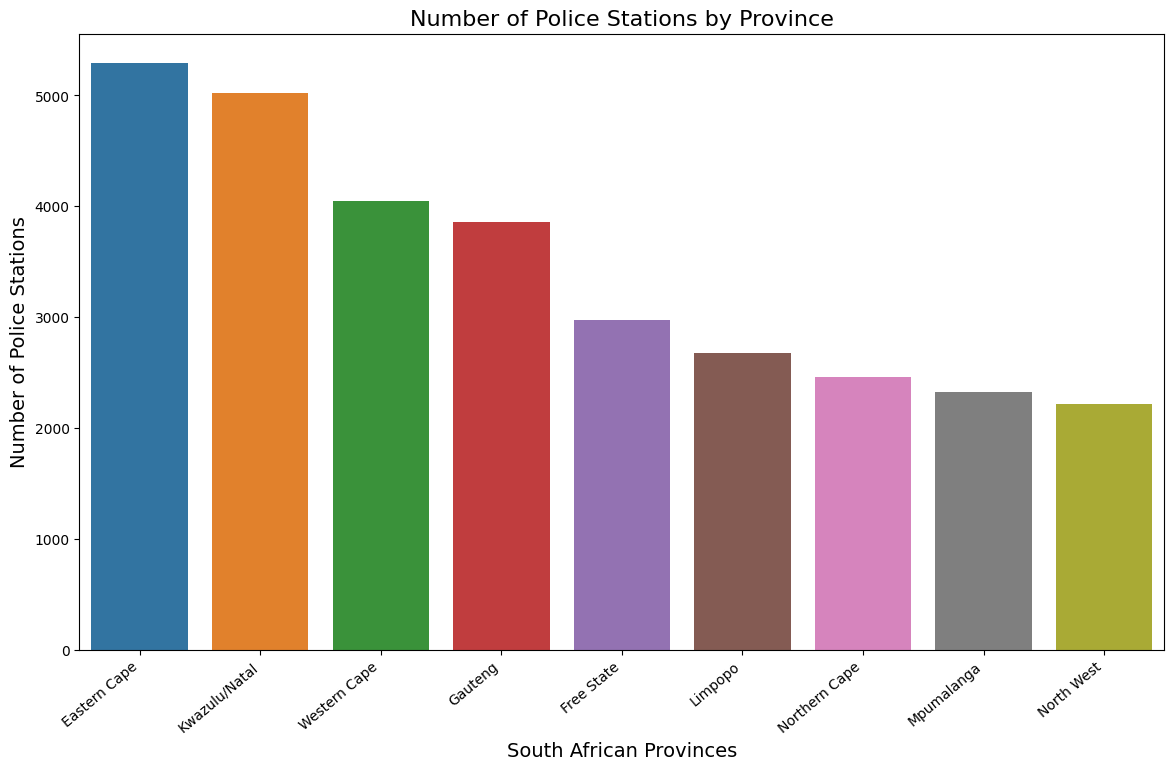

In [ ]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=total_province_stations,x='Province',y='Total Stations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'South African Provinces')

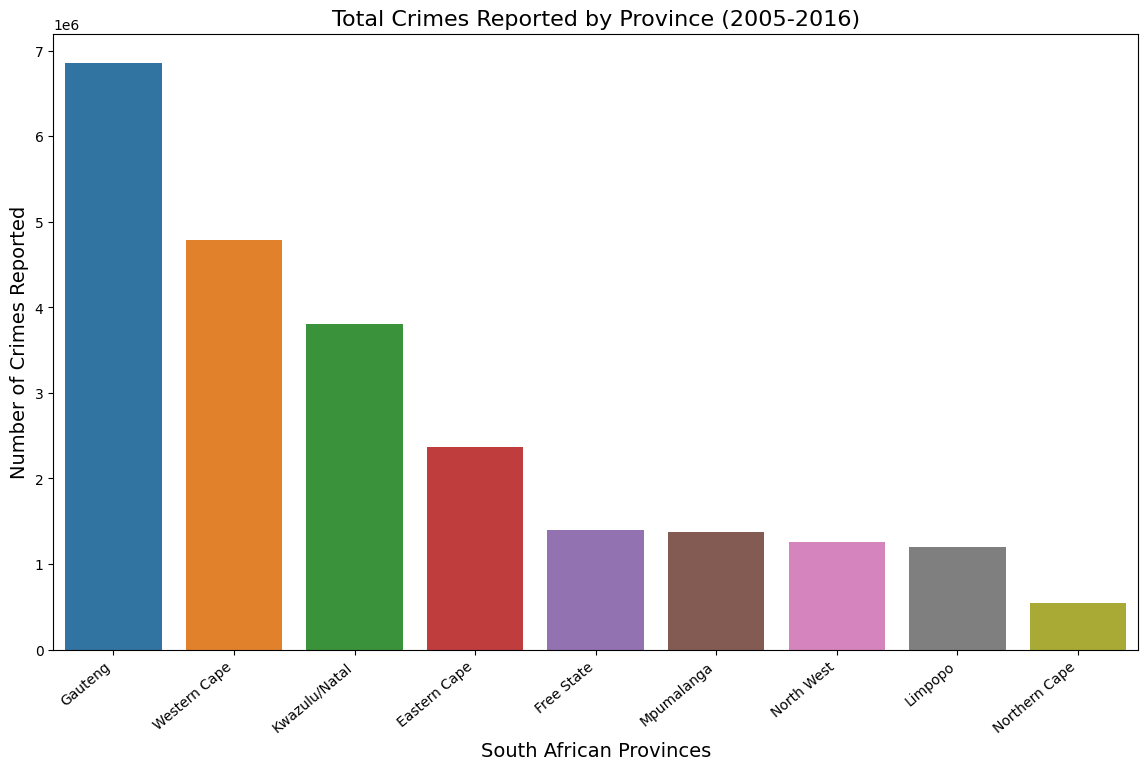

In [ ]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=province_totals,x='Province',y='Total 2005-2016')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Province (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=14)
ax.set_xlabel('South African Provinces',fontsize=14)

Text(0.5, 0, 'Number of Crimes Reported')

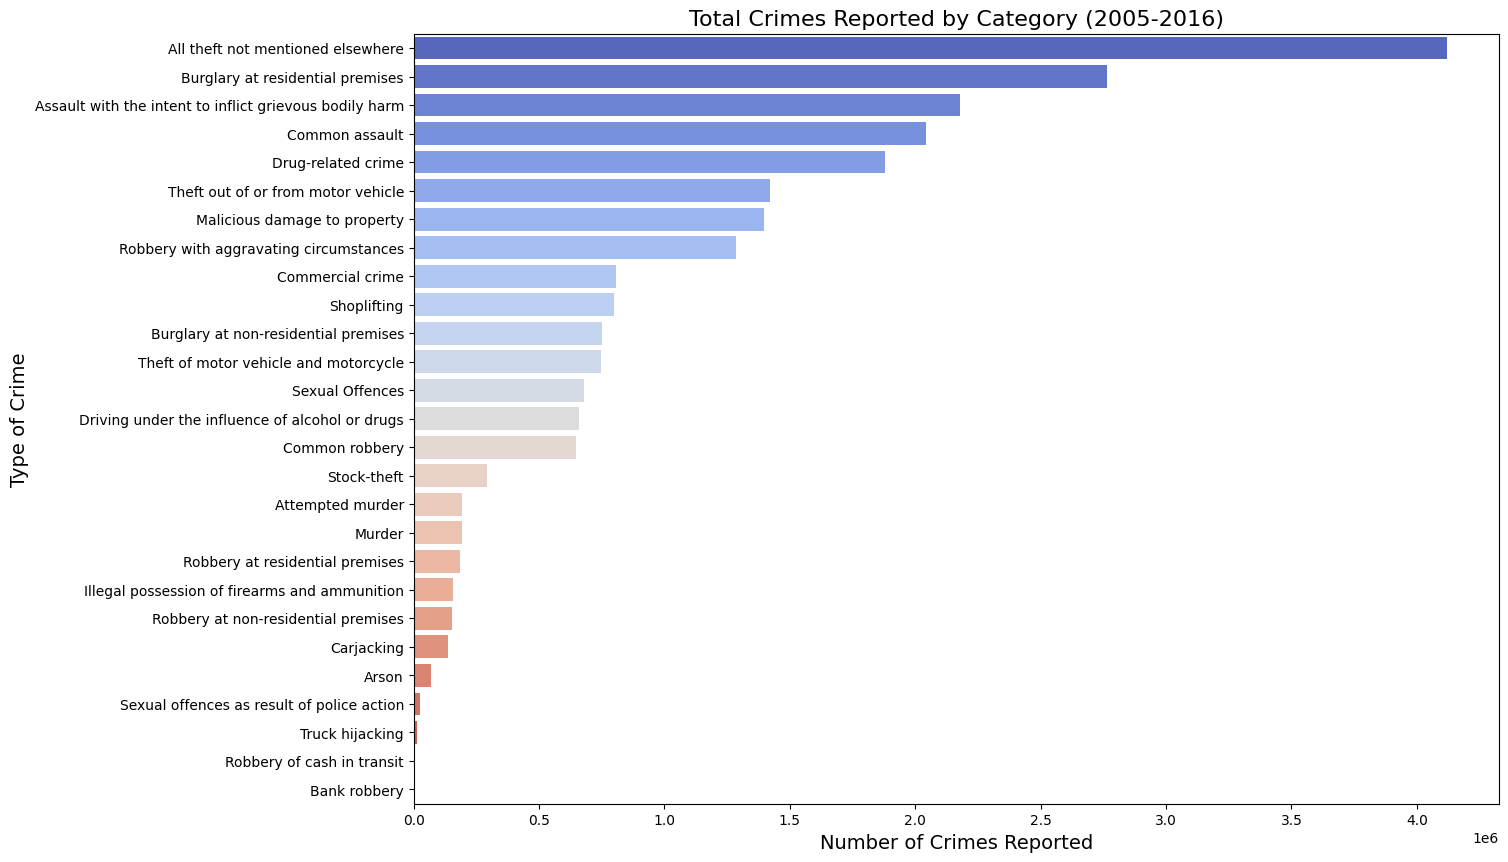

In [ ]:
# Plot Figure
plt.figure(figsize=(14,10)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=category_totals,y='Category',x='Total 2005-2016',palette='coolwarm')
ax.set_title('Total Crimes Reported by Category (2005-2016)',fontsize=16)
ax.set_ylabel('Type of Crime',fontsize=14)
ax.set_xlabel('Number of Crimes Reported',fontsize=14)

Text(0.5, 0, 'South African Police Stations')

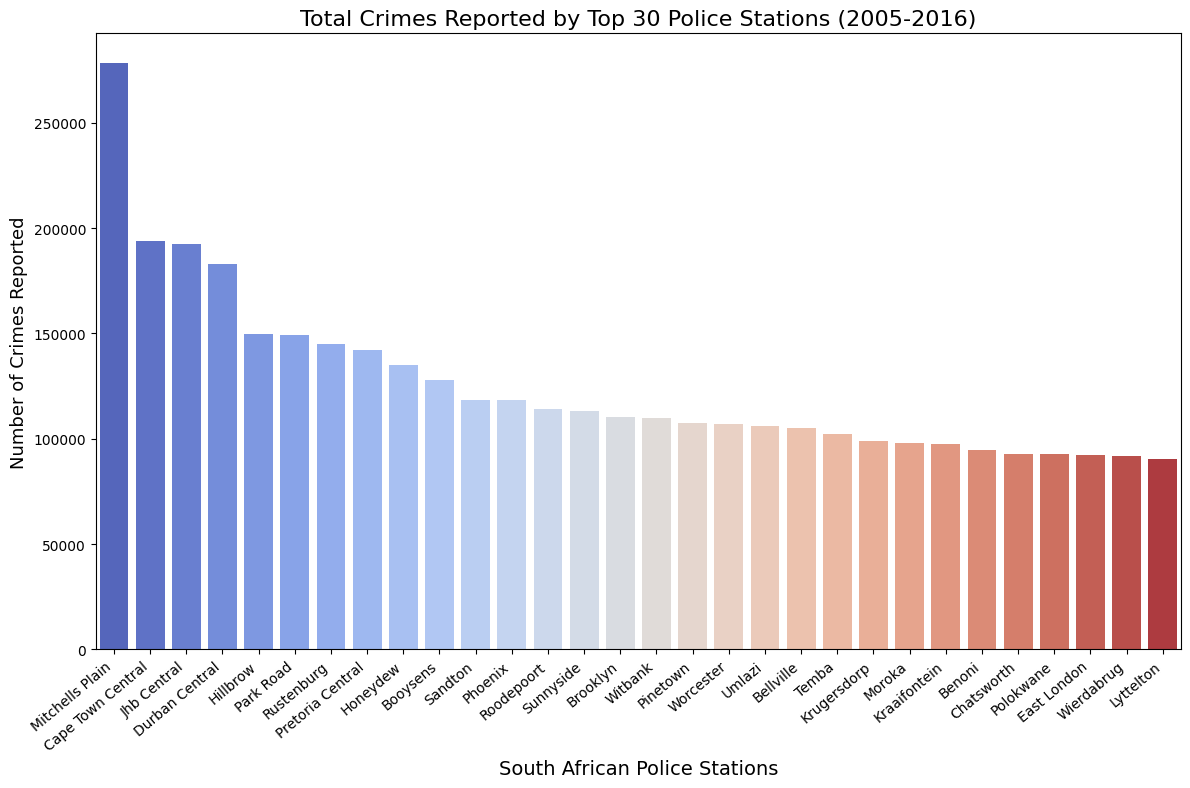

In [ ]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=station_totals.head(30),x='Station',y='Total 2005-2016', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total Crimes Reported by Top 30 Police Stations (2005-2016)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=13)
ax.set_xlabel('South African Police Stations',fontsize=14)

In [ ]:
category_df = pd.DataFrame(category_totals)
print(category_df)

                                             Category  2005-2006  2006-2007  \
0                   All theft not mentioned elsewhere     424690     407714   
6                    Burglary at residential premises     261403     248462   
2   Assault with the intent to inflict grievous bo...     225659     216754   
9                                      Common assault     225436     207869   
12                                 Drug-related crime      94801     104369   
25                 Theft out of or from motor vehicle     138586     123361   
14                       Malicious damage to property     141776     140713   
19             Robbery with aggravating circumstances     119242     126038   
8                                    Commercial crime      51911      59637   
22                                        Shoplifting      64433      65428   
5                Burglary at non-residential premises      54217      58240   
24              Theft of motor vehicle and motorcycl

<Axes: title={'center': 'Correlation Heatmap'}>

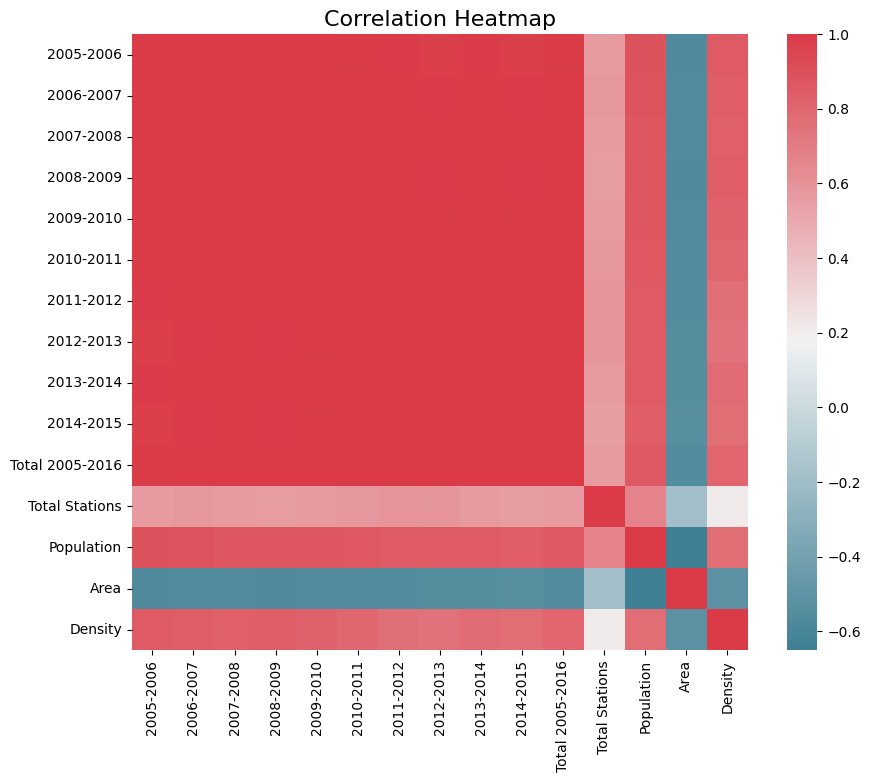

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Heatmap',fontsize=16)
corr = province_totals.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

From the above Correlation Heatmap, there is clearly a strong positive correlation between the total amount of crimes committed compared to the population and density of a Province. There is also a positive correlation between the total number of police stations in a province compared to the total amount of crimes. This does not mean that there is higher crime because there are more police stations but perhaps there are more stations to combat the higher amount of crime. It can also be observed that there is a negative correlation between the area size of a province compared to the number of crimes committed. All this can be further illustrated with a Correlation Gradient below:

In [ ]:
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,Total 2005-2016,Total Stations,Population,Area,Density
2005-2006,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.98,0.98,0.98,0.99,0.57,0.89,-0.57,0.86
2006-2007,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.99,0.99,1.00,0.57,0.88,-0.57,0.84
2007-2008,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.57,0.83
2008-2009,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.56,0.88,-0.57,0.84
2009-2010,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,1.00,0.57,0.87,-0.56,0.82
2010-2011,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.58,0.86,-0.56,0.80
2011-2012,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.60,0.86,-0.55,0.76
2012-2013,0.98,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.59,0.85,-0.55,0.74
2013-2014,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.57,0.85,-0.54,0.78
2014-2015,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.55,0.83,-0.54,0.77


In [ ]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

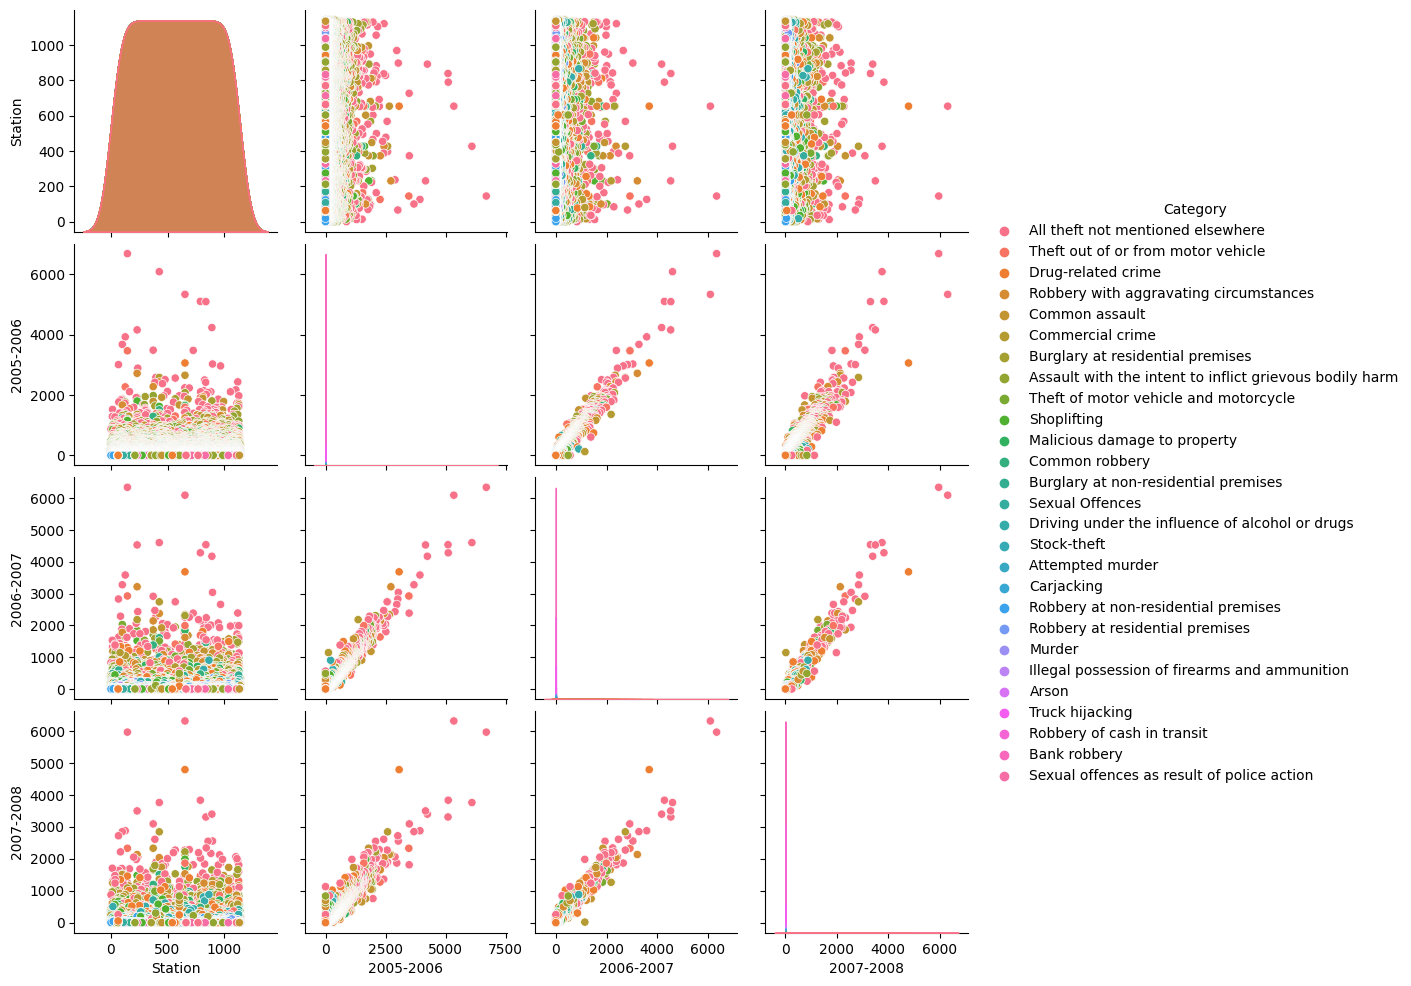

In [ ]:
 # Create a pair plot
 sns.pairplot(df.iloc[:,1:6], hue='Category')

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1.head()

,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
2,Eastern Cape,6562053,168966,38.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0


In [ ]:

print(df.shape)
label = df['Category'].values
feedback = df.drop(['Province'], axis=1)
print(label.shape)
print(feedback.shape)
print("------------------------------")

from sklearn.model_selection import train_test_split
inputtrain, inputtest, outputtrain, outputtest = train_test_split(feedback, label, test_size=0.20, stratify=label)
print(inputtrain.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputtest.shape)


(30861, 15)
(30861,)
(30861, 14)
------------------------------
(24688, 14)
(6173, 14)
(24688,)
(6173,)


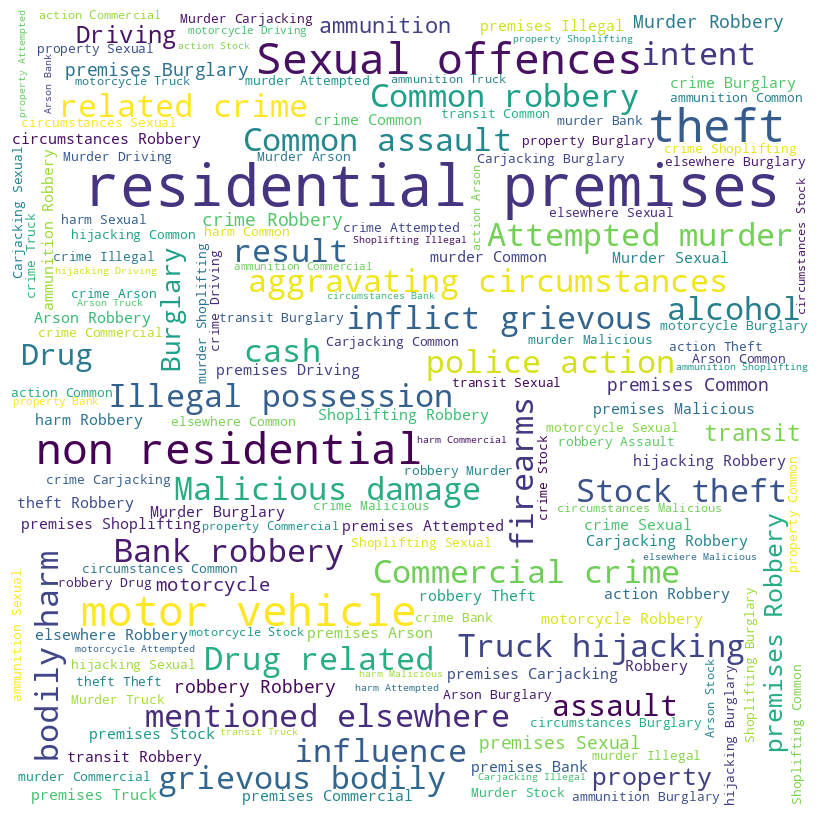

In [ ]:
#print(data['clean_essay'])
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in inputtrain['Category'].values: 
      
    
    val = str(val) 
  
     
    tokens = val.split() 
      
    
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
    
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [ ]:
df1 = pd.read_csv('/content/sample_data/ProvincePopulation (1).csv').sort_values('Population',ascending=False)

In [ ]:
df1.head()

,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
5,Eastern Cape,6562053,168966,38.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0


In [ ]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(13, 13)

##Methodology (Model Building)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


FEATURE ENGINEERING

In [ ]:
df2 = pd.merge(df,df1)
df2.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,Western Cape,145,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,Western Cape,654,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
2,Western Cape,145,Theft out of or from motor vehicle,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509,33863,5822734,129462,45.0
3,Western Cape,654,Drug-related crime,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609,57650,5822734,129462,45.0
4,Western Cape,66,All theft not mentioned elsewhere,3010,2828,2721,2911,2691,2180,2435,2231,2249,2136,1839,27231,5822734,129462,45.0


In [ ]:
df2.iloc[:,2:19]

,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
2,Theft out of or from motor vehicle,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509,33863,5822734,129462,45.0
3,Drug-related crime,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609,57650,5822734,129462,45.0
4,All theft not mentioned elsewhere,3010,2828,2721,2911,2691,2180,2435,2231,2249,2136,1839,27231,5822734,129462,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,Malicious damage to property,0,0,0,176,170,129,91,95,92,138,131,1022,1145861,372889,3.1
30857,All theft not mentioned elsewhere,0,0,0,228,201,139,143,106,132,179,141,1269,1145861,372889,3.1
30858,Common assault,0,0,0,265,224,113,116,130,112,134,162,1256,1145861,372889,3.1
30859,Burglary at residential premises,0,0,0,234,262,309,224,203,211,211,193,1847,1145861,372889,3.1


In [ ]:
df2.iloc[:,[2]]

,Category
0,All theft not mentioned elsewhere
1,All theft not mentioned elsewhere
2,Theft out of or from motor vehicle
3,Drug-related crime
4,All theft not mentioned elsewhere
...,...
30856,Malicious damage to property
30857,All theft not mentioned elsewhere
30858,Common assault
30859,Burglary at residential premises


In [ ]:
from sklearn import preprocessing

cat = preprocessing.LabelEncoder()

df2['Category'] = cat.fit_transform(df2['Category'])

df2.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,Western Cape,145,0,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,Western Cape,654,0,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
2,Western Cape,145,25,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509,33863,5822734,129462,45.0
3,Western Cape,654,12,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609,57650,5822734,129462,45.0
4,Western Cape,66,0,3010,2828,2721,2911,2691,2180,2435,2231,2249,2136,1839,27231,5822734,129462,45.0


In [ ]:
df3 = df2.drop(columns=['Station'])
df3.head()

,Province,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,Western Cape,0,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,Western Cape,0,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
2,Western Cape,25,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509,33863,5822734,129462,45.0
3,Western Cape,12,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609,57650,5822734,129462,45.0
4,Western Cape,0,3010,2828,2721,2911,2691,2180,2435,2231,2249,2136,1839,27231,5822734,129462,45.0


In [ ]:
from sklearn import preprocessing

prv = preprocessing.LabelEncoder()

df3['Province'] = prv.fit_transform(df3['Province'])

df3.head()

,Province,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,8,0,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,8,0,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
2,8,25,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509,33863,5822734,129462,45.0
3,8,12,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609,57650,5822734,129462,45.0
4,8,0,3010,2828,2721,2911,2691,2180,2435,2231,2249,2136,1839,27231,5822734,129462,45.0


In [ ]:
X = df3.iloc[:,:31]
Y = df3.iloc[:,[1]]

In [ ]:
X.head()

,Province,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,Total 2005-2016,Population,Area,Density
0,8,0,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,61631,5822734,129462,45.0
1,8,0,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,60624,5822734,129462,45.0
2,8,25,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509,33863,5822734,129462,45.0
3,8,12,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609,57650,5822734,129462,45.0
4,8,0,3010,2828,2721,2911,2691,2180,2435,2231,2249,2136,1839,27231,5822734,129462,45.0


In [ ]:

Y.head()

,Category
0,0
1,0
2,25
3,12
4,0


In [ ]:
#Split the dataset into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 0)

In [ ]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
predict=log.predict(X_test)
acc1=accuracy_score (predict,Y_test)
print(acc1)

clf1=classification_report(predict,Y_test)
print(clf1)



0.6641105950966627
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       320
           1       0.99      0.86      0.92       410
           2       0.80      0.90      0.85       302
           3       0.47      0.75      0.58       207
           4       1.00      0.46      0.63       653
           5       0.60      0.75      0.67       289
           6       0.64      0.78      0.71       262
           7       0.57      0.44      0.50       434
           8       0.44      0.63      0.52       223
           9       0.54      0.79      0.64       242
          10       0.79      0.70      0.74       413
          11       0.50      0.62      0.55       277
          12       0.52      0.79      0.63       243
          13       0.93      0.52      0.67       555
          14       0.59      0.77      0.67       256
          15       0.64      0.82      0.72       275
          16       0.49      0.58      0.53       278
        

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree.fit(X_train, Y_train)
predict2=tree.predict(X_test)
acc2=accuracy_score (predict2,Y_test)
print(acc2)

clf2=classification_report(predict2,Y_test)
print(clf2)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       357
           2       1.00      1.00      1.00       339
           3       1.00      1.00      1.00       332
           4       1.00      1.00      1.00       303
           5       1.00      1.00      1.00       361
           6       1.00      1.00      1.00       319
           7       1.00      1.00      1.00       336
           8       1.00      1.00      1.00       315
           9       1.00      1.00      1.00       354
          10       1.00      1.00      1.00       368
          11       1.00      1.00      1.00       340
          12       1.00      1.00      1.00       367
          13       1.00      1.00      1.00       314
          14       1.00      1.00      1.00       334
          15       1.00      1.00      1.00       353
          16       1.00      1.00      1.00       329
          17       1.00

In [ ]:
#Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
forest.fit(X_train, Y_train)

predict3 = forest.predict(X_test)
print(predict3)

acc3 = accuracy_score(predict3,Y_test)
print(acc3)

clf3 = classification_report(predict3,Y_test)
print(clf3)

[23  2 23 ...  6 22 25]
0.8627281563883789
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       333
           1       0.87      0.81      0.84       385
           2       0.88      0.92      0.90       324
           3       0.77      0.80      0.79       321
           4       1.00      0.78      0.88       386
           5       0.79      0.86      0.82       334
           6       0.87      0.94      0.90       295
           7       0.94      0.67      0.78       474
           8       0.73      0.87      0.80       265
           9       0.90      0.95      0.92       338
          10       0.77      0.89      0.83       318
          11       0.81      0.73      0.77       381
          12       0.83      0.93      0.88       326
          13       0.75      0.81      0.78       291
          14       0.91      0.94      0.92       322
          15       0.72      0.85      0.78       296
          16       0.92      0.76     

In [ ]:
#Using K Neighbors Classifier 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

predict4 = knn.predict(X_test)
print(predict3)

acc4 = accuracy_score(predict4,Y_test)
print(acc4)

clf4 = classification_report(predict4,Y_test)
print(clf4)

[23  2 23 ...  6 22 25]
0.8601360838103467
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       336
           1       1.00      0.96      0.98       369
           2       0.81      0.64      0.72       429
           3       0.94      0.98      0.96       316
           4       1.00      1.00      1.00       303
           5       0.81      0.85      0.83       344
           6       0.66      0.58      0.62       364
           7       0.95      0.97      0.96       330
           8       0.82      0.86      0.84       301
           9       0.69      0.63      0.66       389
          10       0.80      0.82      0.81       358
          11       0.80      0.83      0.82       325
          12       0.75      0.81      0.78       339
          13       0.94      0.95      0.95       308
          14       0.82      0.78      0.80       351
          15       0.91      0.95      0.93       339
          16       0.95      0.94     

In [ ]:
#Using Support Vector Machines of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'linear', random_state=0)
SVMclassifier.fit(X_train, Y_train)

predict5 = SVMclassifier.predict(X_test)
print(predict5)

acc5 = accuracy_score(predict5,Y_test)
print(acc5)

clf5 = classification_report(predict5,Y_test)
print(clf5)

[23  2 23 ...  6 22 25]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       357
           2       1.00      1.00      1.00       339
           3       1.00      1.00      1.00       332
           4       1.00      1.00      1.00       303
           5       1.00      1.00      1.00       361
           6       1.00      1.00      1.00       319
           7       1.00      1.00      1.00       336
           8       1.00      1.00      1.00       315
           9       1.00      1.00      1.00       354
          10       1.00      1.00      1.00       368
          11       1.00      1.00      1.00       340
          12       1.00      1.00      1.00       367
          13       1.00      1.00      1.00       314
          14       1.00      1.00      1.00       334
          15       1.00      1.00      1.00       353
          16       1.00      1.00      1.00       329

##Model Evaluation

<Figure size 3000x3000 with 0 Axes>

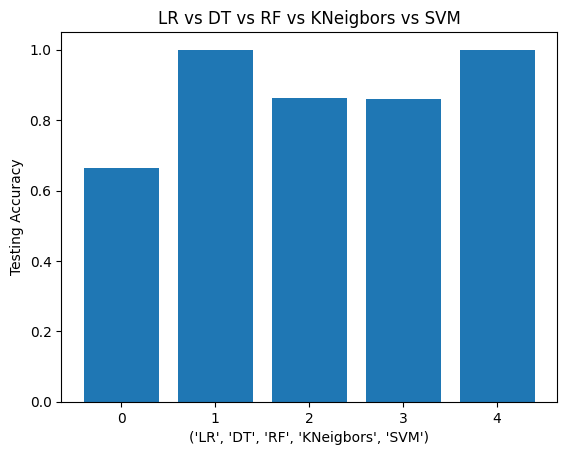

<Figure size 3000x3000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from matplotlib import pyplot as plt

labels = 'LR', 'DT', 'RF', 'KNeigbors', 'SVM'

objects = [acc1,acc2,acc3,acc4,acc5]
y_pos = np.arange(len(objects))

plt.bar(y_pos, objects)

plt.xticks()
plt.xlabel(labels)
plt.ylabel('Testing Accuracy')
plt.title('LR vs DT vs RF vs KNeigbors vs SVM')
plt.figure(figsize=(30,30))

In [ ]:
models = [('Logistic Regression', acc1, log),
          ('Decision Tree Classifier', acc2, tree),
          ('Random Forest', acc3, forest),
          ('Kneigbors', acc4, knn),
          ('SVM Classifier', acc5, SVMclassifier), 
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Algorithms', 'Testing Accuracies', 'Training Accuracies'])
predict

,Algorithms,Testing Accuracies,Training Accuracies
0,Logistic Regression,0.664111,LogisticRegression(random_state=0)
1,Decision Tree Classifier,1.000000,"DecisionTreeClassifier(criterion='entropy', ra..."
2,Random Forest,0.862728,"(DecisionTreeClassifier(criterion='entropy', m..."
3,Kneigbors,0.860136,KNeighborsClassifier()
4,SVM Classifier,1.000000,"SVC(kernel='linear', random_state=0)"


##Output

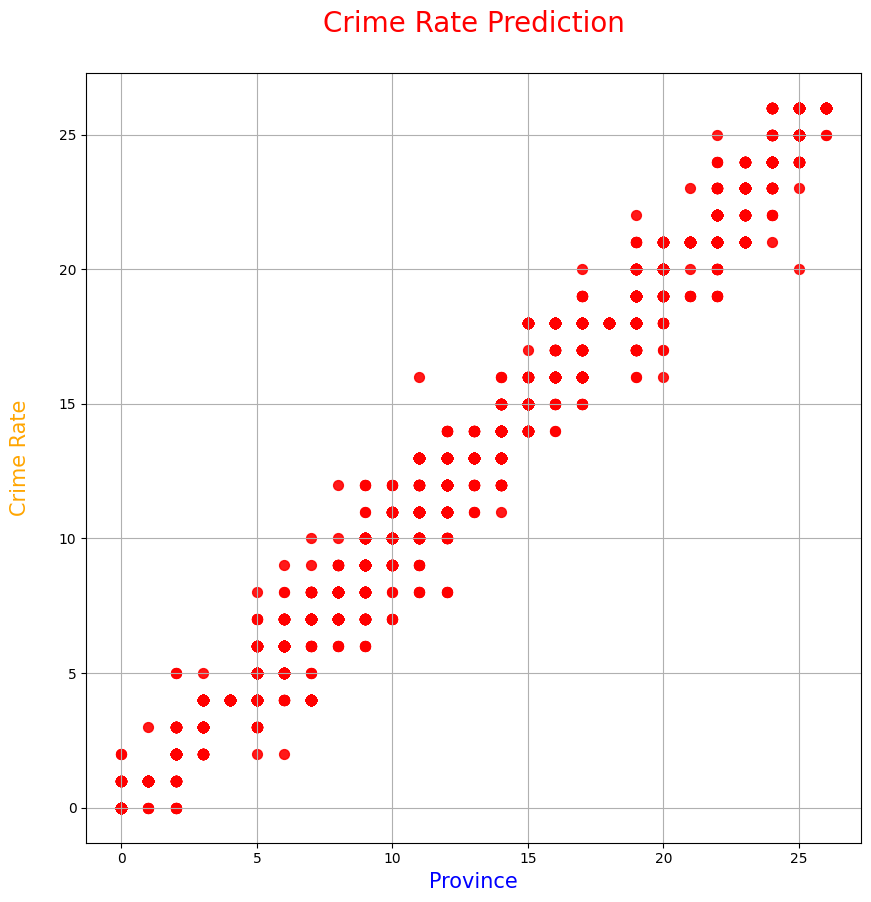

In [ ]:
# (Logistic Regression)
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predict, marker="o", alpha=0.9, color="red", s=50)
plt.title("Crime Rate Prediction\n", color="red",fontsize=20)
plt.xlabel("Province", fontsize=15, color="Blue")
plt.ylabel("Crime Rate\n", fontsize=15, color="orange")
plt.grid(True)
plt.show()

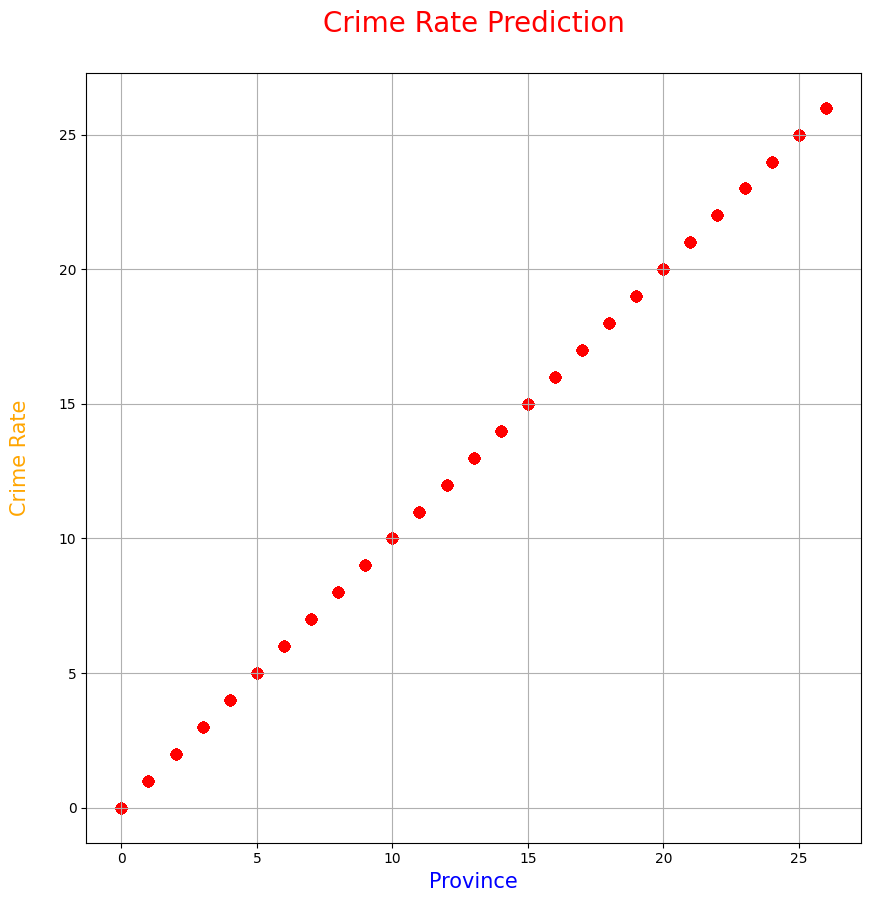

In [ ]:
#(Decision Tree)
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predict2, marker="o", alpha=0.9, color="red", s=50)
plt.title("Crime Rate Prediction\n", color="red",fontsize=20)
plt.xlabel("Province", fontsize=15, color="Blue")
plt.ylabel("Crime Rate\n", fontsize=15, color="orange")
plt.grid(True)
plt.show()

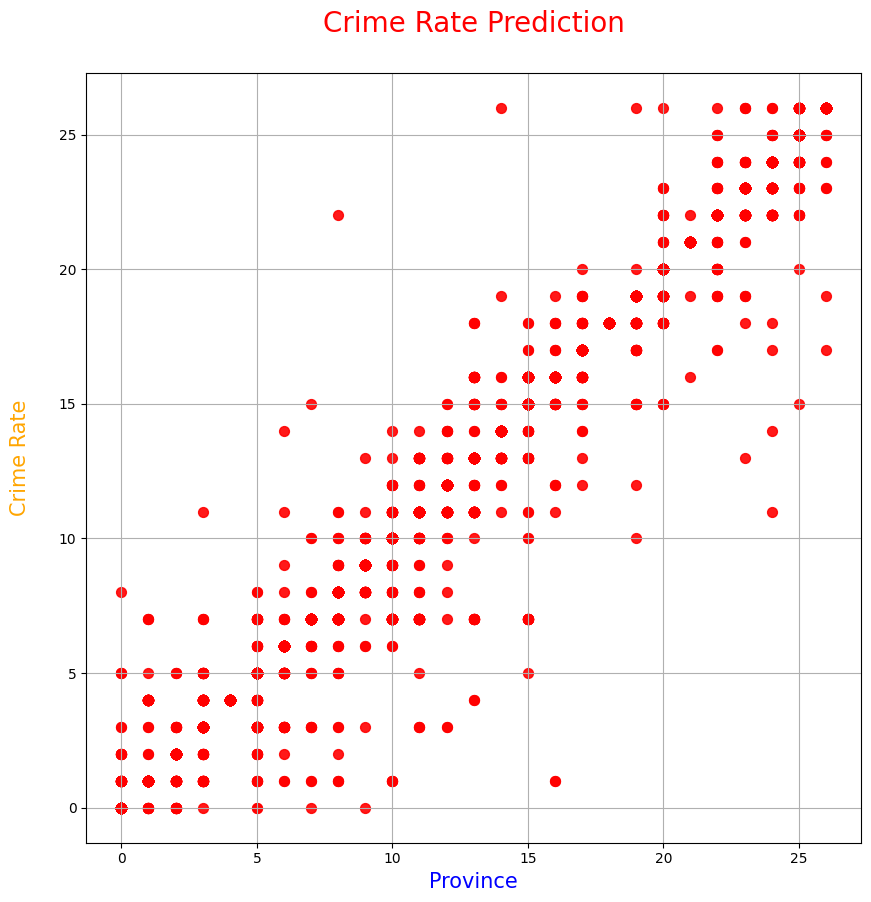

In [ ]:
# (Random Forest)
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predict3, marker="o", alpha=0.9, color="red", s=50)
plt.title("Crime Rate Prediction\n", color="red",fontsize=20)
plt.xlabel("Province", fontsize=15, color="Blue")
plt.ylabel("Crime Rate\n", fontsize=15, color="orange")
plt.grid(True)
plt.show()

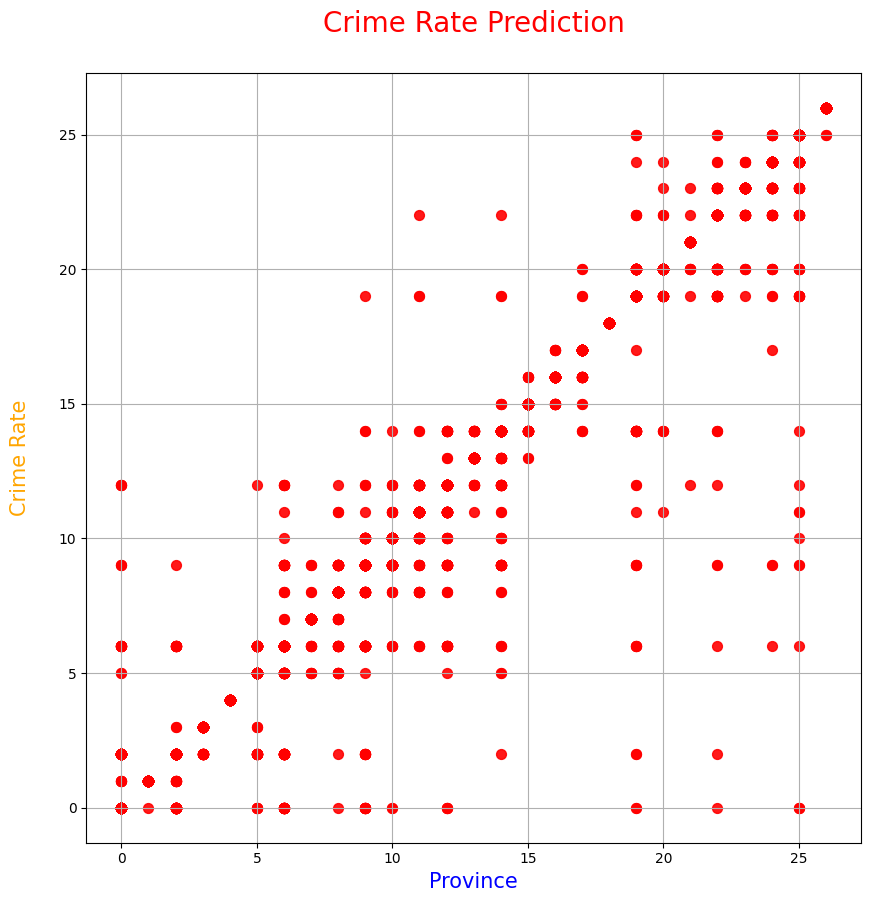

In [ ]:
# (Kneighbors)
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predict4, marker="o", alpha=0.9, color="red", s=50)
plt.title("Crime Rate Prediction\n", color="red",fontsize=20)
plt.xlabel("Province", fontsize=15, color="Blue")
plt.ylabel("Crime Rate\n", fontsize=15, color="orange")
plt.grid(True)
plt.show()

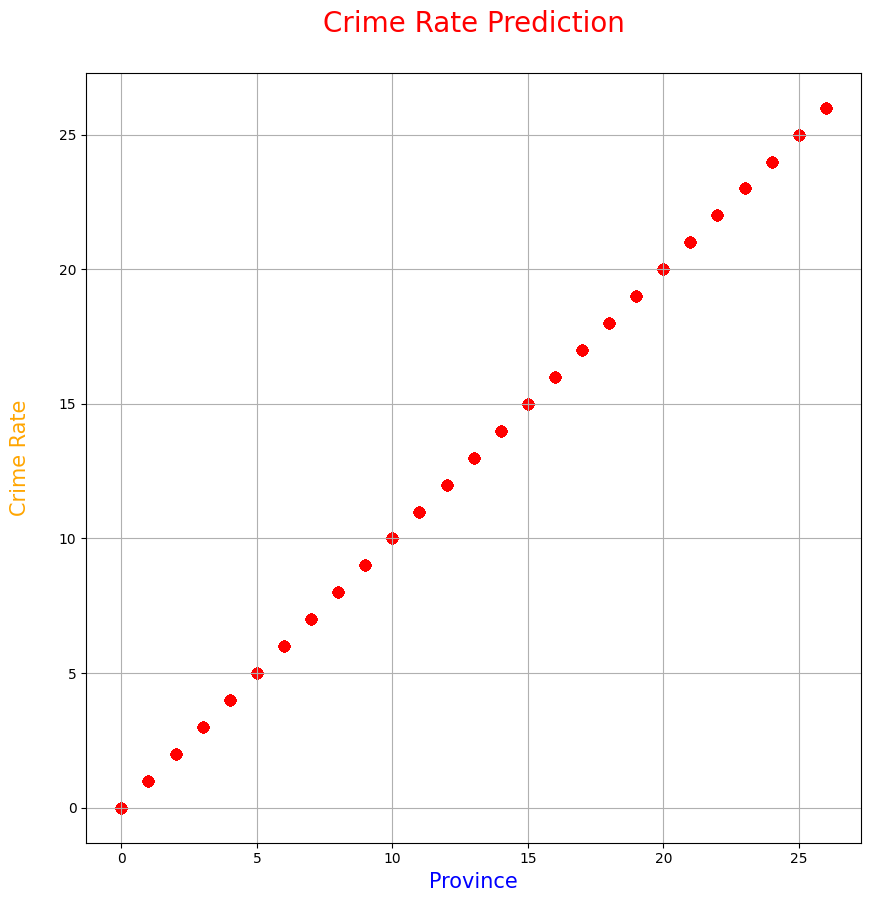

In [ ]:
# (SVM)
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predict5, marker="o", alpha=0.9, color="red", s=50)
plt.title("Crime Rate Prediction\n", color="red",fontsize=20)
plt.xlabel("Province", fontsize=15, color="Blue")
plt.ylabel("Crime Rate\n", fontsize=15, color="orange")
plt.grid(True)
plt.show()